<a href="https://colab.research.google.com/github/milad-B/assets/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 07 : Linear Regression</font></h1>
<h1 align=center><font size = 4>Filoger Summer School, 1401 | DeadLine: 5th Mordad, 23:00 </font></h1>

## Question Sheet!

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

<b>Download the Question sheet from the following link!</b>
-   <a href="https://new.edmodo.com/groups/filoger-summer-school-38664125">Lab 07: Question sheet: Linear Regression</a>
</font>
</div>

# **Linear Regression**

## Step1: Import the libraries

In [70]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm , metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

from joblib import dump , load


## Step2: Import the Data

In [2]:
df = pd.read_csv('/content/insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Step3: Data overview (General information about dataset)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

Check for NULL/MISSING values

In [8]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending = False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
# percentage of missing values in each row
round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending = False)[:5]

0      0.0
898    0.0
896    0.0
895    0.0
894    0.0
dtype: float64

## Step4: Data preparation --> Dealing with Categorical Data

Convert to 'category' data type


In [9]:
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['children'] = df['children'].astype('category')
df['region'] = df['region'].astype('category')


### One Hot (Encode the Categorical features)

In [15]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

df_new = pd.get_dummies(df, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


In [74]:
df_new.head()


,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [17]:
df_new.shape

(1338, 13)

# 📈 Training a Linear Regression Model

## Step5: Determine the Features & Target Variable

In [90]:
X = df_new.drop('charges' , axis=1)

y = df_new['charges']

## Step6: Split the Dataset to Train & Test

In [112]:
np.random.seed(0)

df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [92]:
df_train.shape

(936, 13)

In [93]:
df_test.shape

(402, 13)

Visualising Numeric Variables

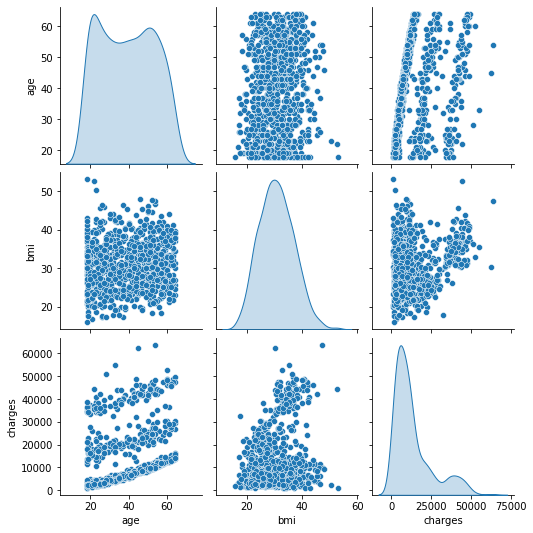

In [103]:
# Create a new dataframe of only numeric variables:

df_num=df_train[[ 'age', 'bmi', 'charges']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

Visualising Catagorical Variables

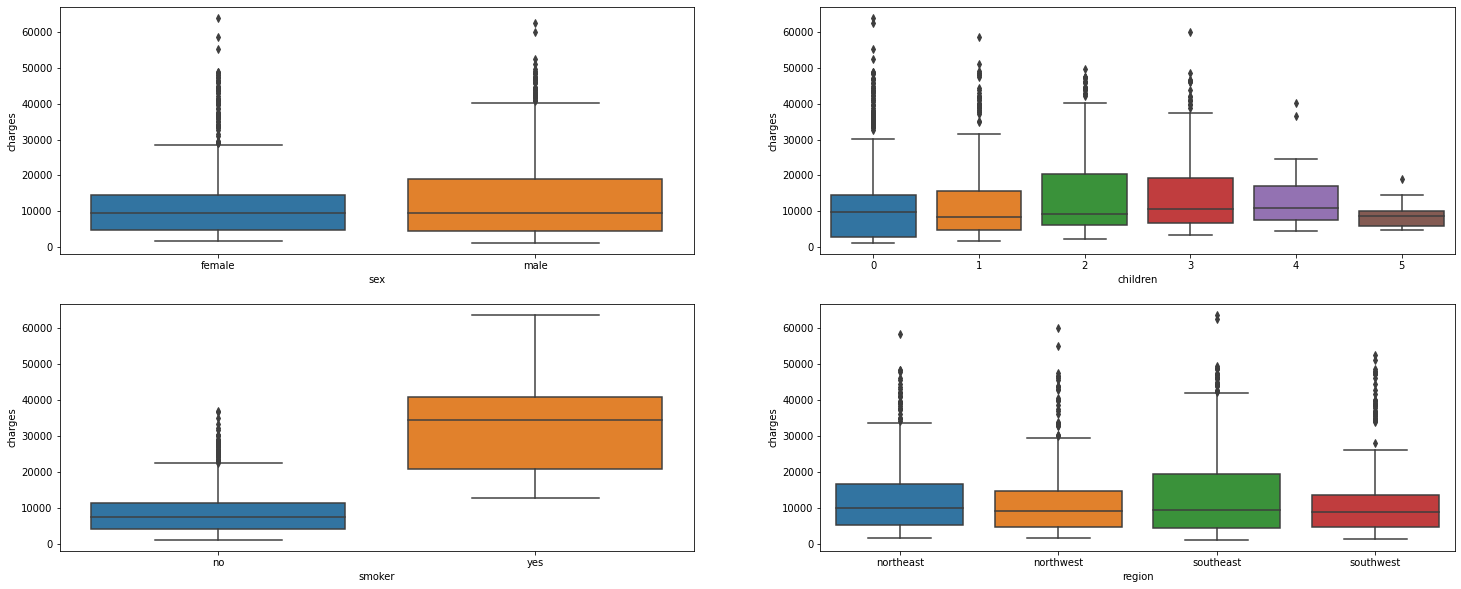

In [95]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = df)
plt.show()

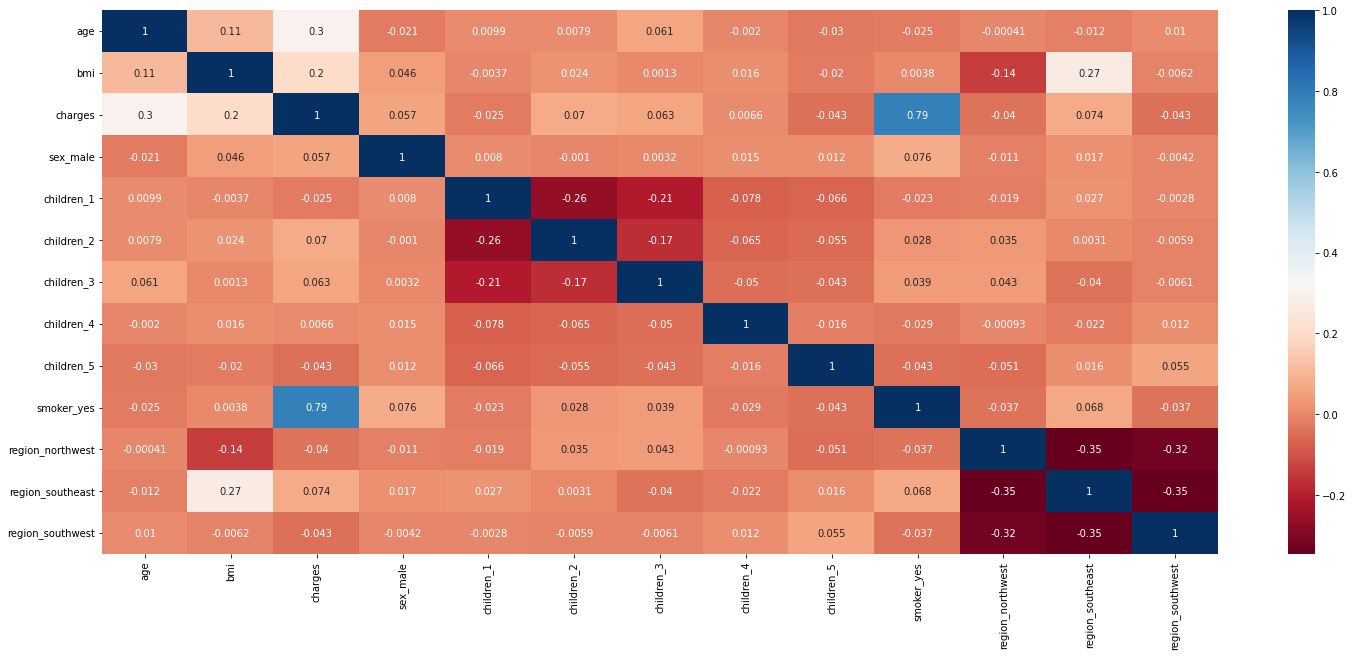

In [96]:
plt.figure(figsize = (25,10))
sns.heatmap(df_new.corr(), annot = True, cmap="RdBu")
plt.show()

## Step7: Train the Model using the X_train and y_train

In [113]:
X_train = df_train.drop('charges' , axis=1)
y_train = df_train['charges']


In [114]:
X_test = df_test.drop('charges' , axis=1)
y_test = df_test['charges']

In [115]:
lm= LinearRegression()

In [116]:
lm.fit(X_train,y_train)

LinearRegression()

## Step8: Coeficient Matrix (Find the coefficients)

In [117]:
lm.coef_


array([  260.49619235,   288.23372405,    40.55407287,  -363.45033663,
        1519.70508853,   888.30167303,  2372.11570257,  1751.2789966 ,
       23965.11320754,  -761.3122686 ,  -933.87156242, -1610.99180095])

In [118]:
coefficient = pd.DataFrame(lm.coef_ , X.columns, columns=['coefficients'])
coefficient


,coefficients
age,260.496192
bmi,288.233724
sex_male,40.554073
children_1,-363.450337
children_2,1519.705089
children_3,888.301673
children_4,2372.115703
children_5,1751.278997
smoker_yes,23965.113208
region_northwest,-761.312269


## Step8: Predicting Test Data

In [119]:
y_pred = lm.predict(X_test)

In [120]:
pd.DataFrame({'Y_test':y_test , 'Y_pred':y_pred})

,Y_test,Y_pred
12,1826.84300,4239.981038
306,20177.67113,5032.800320
318,7421.19455,8572.507731
815,1877.92940,3247.651478
157,15518.18025,25854.648981
...,...,...
710,1727.54000,3481.756958
1005,4433.38770,7402.758770
389,4618.07990,4990.205059
923,4320.41085,8362.969406


## Step9: Evalutaing the Model (Find the error (MSE) of the model)

In [122]:
MSE = metrics.mean_squared_error(y_test , y_pred ,squared=False)
MSE

5723.846696274749

## Step10: Residuals (Difference between y_test and y_pred)

In [123]:
residuals = y_test - y_pred


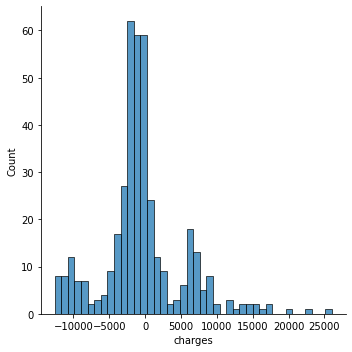

In [124]:
sns.displot(residuals)

## Step11: Saving and Loading the Model (Save the trained model and load that again)

In [125]:
final_model = lm
final_model.fit(X , y)

LinearRegression()

In [126]:
dump(final_model , 'lm.joblib' )

['lm.joblib']

## Step12: Predict a sample  (ex: [19, 27.9, 0,0,1,0,0,1])

In [127]:
load_model = load('lm.joblib')

In [128]:
e = [[19, 27.9, 0 , 0 , 1 , 0 , 0 ,1 , 1 , 0 , 1 , 0]]

In [129]:
p = load_model.predict(e)
print(f'prdicted charges is: {p[0]}')

prdicted charges is: 27914.346989891565


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
